# **CAR PRICE ANALYSIS**

## Objectives

* The purpose of this notebook is to explore and visualise the prepared dataset in order to identify trends, paterns and relationships within the data.
*The visualisation steps are planned as follows:
- Continue examinations of the data
- Create charts to visualise trenda, dependencies, comparisons
- Interpretation of the the findings

## Inputs

* The input file for this notebook is cars_clean.csv

## Outputs

* Data visualisation notebook, presenting plots and statistics

## Additional Comments

* No additional comments. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\Projects\\Car_price_analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\vscode-projects\\Projects\\Car_price_analysis'

# Setup

- Environment setup/Importing necessary libraries:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


- Initial data visualisation

In [5]:
df = pd.read_csv('D:/vscode-projects/test/cars_cleaned.csv') 
df.head(5)

,car_id,symboling,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,car_length,...,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highwaympg,price,brand,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa romeo,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa romeo,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa romeo,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


- Basic descriptive statistics 

In [6]:
print(df.describe().T)

                   count          mean          std      min      25%  \
car_id             205.0    103.000000    59.322565     1.00    52.00   
symboling          205.0      0.834146     1.245307    -2.00     0.00   
wheel_base         205.0     98.756585     6.021776    86.60    94.50   
car_length         205.0    174.049268    12.337289   141.10   166.30   
car_width          205.0     65.907805     2.145204    60.30    64.10   
car_height         205.0     53.724878     2.443522    47.80    52.00   
curb_weight        205.0   2555.565854   520.680204  1488.00  2145.00   
engine_size        205.0    126.907317    41.642693    61.00    97.00   
bore_ratio         205.0      3.329756     0.270844     2.54     3.15   
stroke             205.0      3.255415     0.313597     2.07     3.11   
compression_ratio  205.0     10.142537     3.972040     7.00     8.60   
horse_power        205.0    104.117073    39.544167    48.00    70.00   
peak_rpm           205.0   5125.121951   476.985643

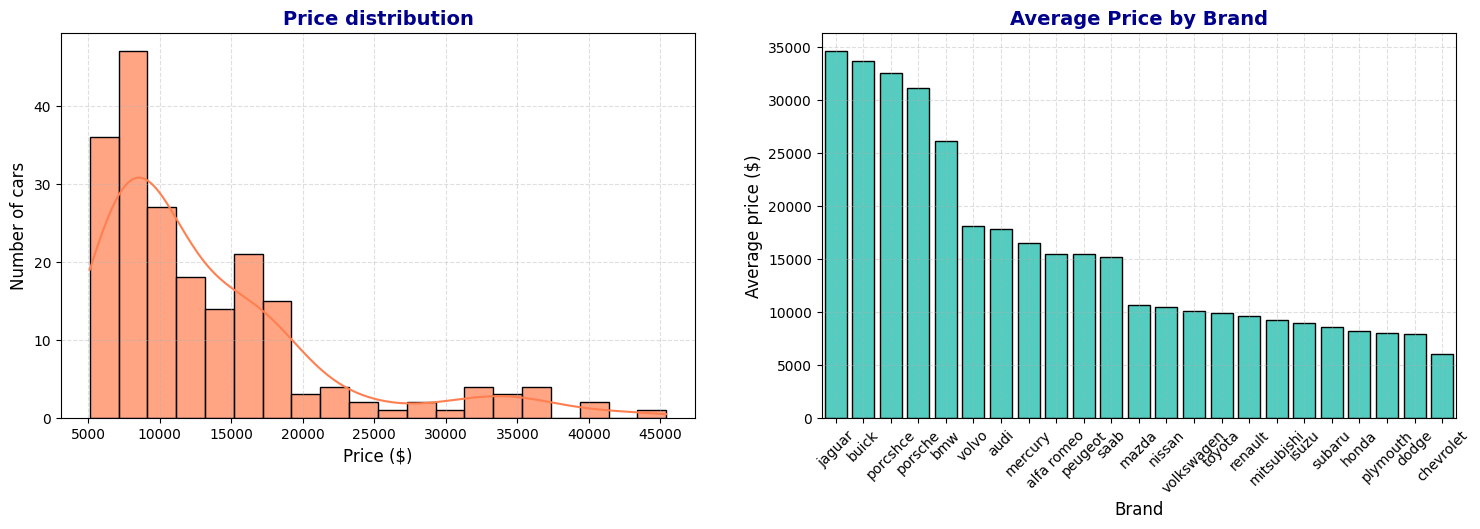

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5)) # 1 row, 2 columns

sns.histplot(df['price'], bins=20, kde=True, color='coral', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title("Price distribution", color='darkblue', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Price ($)", fontsize=12)
axes[0].set_ylabel("Number of cars", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

avg_price_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)

sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, edgecolor='black', color='turquoise', ax=axes[1])
axes[1].set_title("Average Price by Brand", color='darkblue', fontsize=14, fontweight='bold')
axes[1].set_xlabel("Brand", fontsize=12)
axes[1].set_ylabel("Average price ($)", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.4)



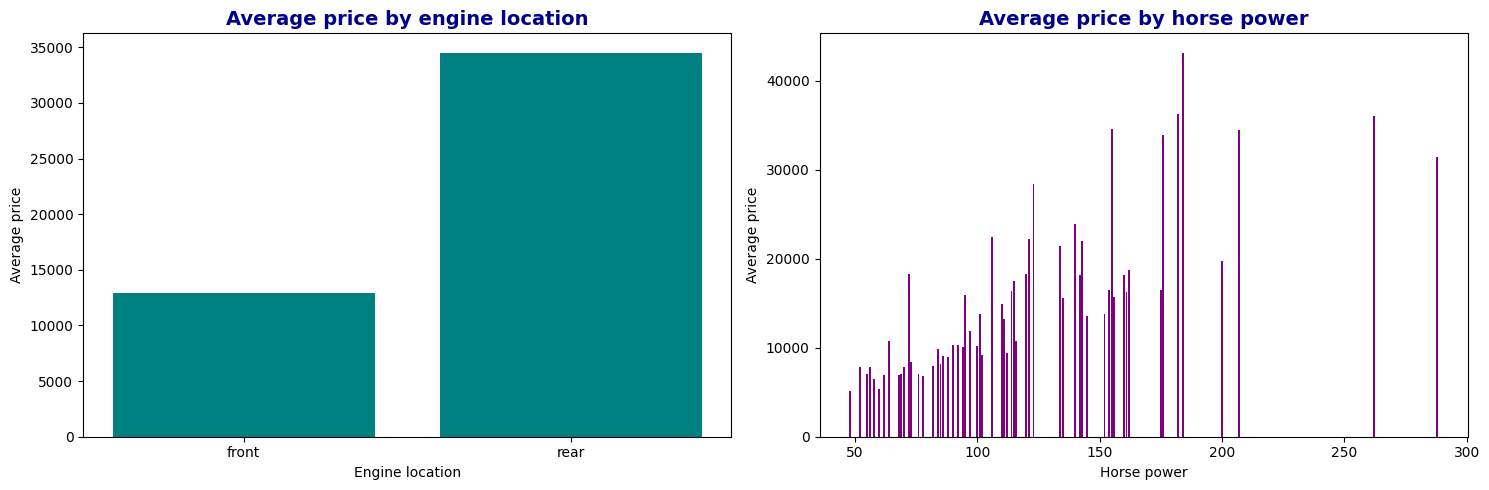

In [8]:
plt.figure(figsize=(15, 5))

# Average Price by Engine Location
plt.subplot(1, 2, 1)
avg_price_loc = df.groupby('engine_location')['price'].mean()
plt.bar(avg_price_loc.index, avg_price_loc.values, color='teal')
plt.title('Average price by engine location', color='darkblue', fontsize=14, fontweight='bold')
plt.xlabel('Engine location')
plt.ylabel('Average price')

# Create the second bar plot: Average Price by Horse Power
plt.subplot(1, 2, 2)
avg_price_hp = df.groupby('horse_power')['price'].mean()
plt.bar(avg_price_hp.index, avg_price_hp.values, color='purple')
plt.title('Average price by horse power', color='darkblue', fontsize=14, fontweight='bold')
plt.xlabel('Horse power')
plt.ylabel('Average price')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


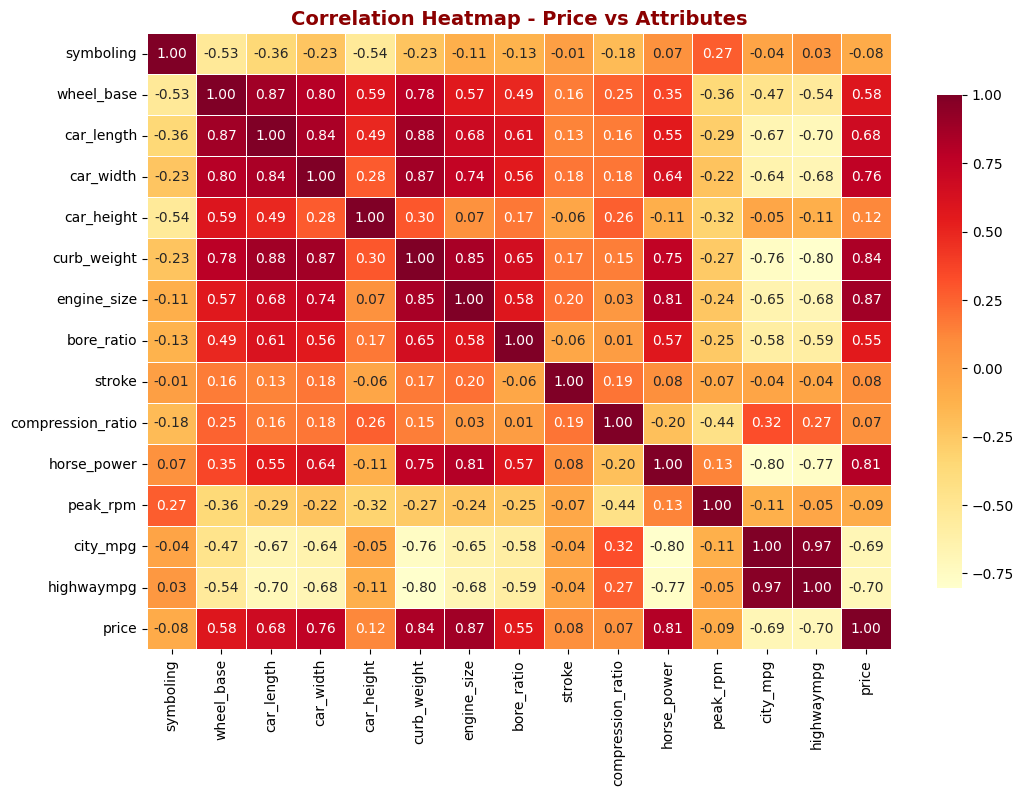

In [9]:
# Select numerical columns for correlation analysis
numerical_columns = df[['symboling', 'wheel_base', 'car_length', 'car_width', 'car_height', 
                        'curb_weight', 'engine_size', 'bore_ratio', 'stroke', 'compression_ratio', 
                        'horse_power', 'peak_rpm', 'city_mpg', 'highwaympg', 'price']]

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot heatmap using Matplotlib

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='YlOrRd', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap - Price vs Attributes", color='darkred', fontsize=14, fontweight='bold')
plt.show()
# Heatmap visualizes the correlation between all numeric variables in the dataset.

# The correlation values will help you understand the strength and direction of the relationships between variables and the target (price).

# This plot helps you identify strong correlations visually 



In [10]:
# Violin plot: Price by Fuel Type
fig_violin = px.violin(df,
                       x='fuel_type',
                       y='price',
                       color='fuel_type',
                       box=True,  # show box inside violin
                       points='all',  # show individual points
                       title="Price Distribution by Fuel Type (Violin)")
fig_violin.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
